In [1]:
import matplotlib.pyplot as plt   # for plotting
import numpy as np        # for reading in and manipulating data
from datetime import datetime  # for date formatting

In [2]:
# location of the file
filepath = 'data/seattle_waterlevels_sept2024.csv'

In [3]:
# Start by trying to open with readlines()

# create a file object
file_obj = open(filepath, 'r')

# open the whole file as a list of strings
lines = file_obj.readlines()

In [4]:
# check how many lines are in the file
print("There are", len(lines), "lines in the file!")

There are 7441 lines in the file!


In [5]:
# print just the first 10 lines
print(lines[0:10])

['"Date","Time (GMT)","Predicted (m)","Preliminary (m)","Verified (m)"\n', '"2024/09/01","00:00","3.378","-","3.453"\n', '"2024/09/01","00:06","3.392","-","3.455"\n', '"2024/09/01","00:12","3.403","-","3.462"\n', '"2024/09/01","00:18","3.412","-","3.462"\n', '"2024/09/01","00:24","3.419","-","3.456"\n', '"2024/09/01","00:30","3.423","-","3.458"\n', '"2024/09/01","00:36","3.424","-","3.455"\n', '"2024/09/01","00:42","3.423","-","3.441"\n', '"2024/09/01","00:48","3.419","-","3.434"\n']


In [6]:
# Instead, let's try accessing one line of the file at a time
print(file_obj.readline())

In [7]:
# close the previous file
file_obj.close()

In [8]:
# Access one line of the file at a time

# create a new file object
file_obj = open(filepath, 'r')

# print out the first 10 lines of the file using a loop
# try writing a loop for this
for i in range(10):
    print(file_obj.readline())

"Date","Time (GMT)","Predicted (m)","Preliminary (m)","Verified (m)"

"2024/09/01","00:00","3.378","-","3.453"

"2024/09/01","00:06","3.392","-","3.455"

"2024/09/01","00:12","3.403","-","3.462"

"2024/09/01","00:18","3.412","-","3.462"

"2024/09/01","00:24","3.419","-","3.456"

"2024/09/01","00:30","3.423","-","3.458"

"2024/09/01","00:36","3.424","-","3.455"

"2024/09/01","00:42","3.423","-","3.441"

"2024/09/01","00:48","3.419","-","3.434"



In [9]:
# What we know about our file:
# one line of header text
# 5 columns: date, time, predicted (m), preliminary (m), verified (m)
# data are separated by commas

In [10]:
# Extract information from all columns that we'll need
# using genfromtxt
data = np.genfromtxt(filepath,
                     skip_header = 1, # there is one line of header text
                     usecols = (0, 1, 2, 4), # columns we want to read in
                     dtype = str,    # read everything in as a string
                     delimiter = ',')  # CSV --> comman-separated value

In [11]:
# look at one row
print(data[0])

['"2024/09/01"' '"00:00"' '"3.378"' '"3.453"']


In [12]:
# Check out the shape of our array
print("The shape of our array is", np.shape(data))

The shape of our array is (7440, 4)


In [13]:
nrows = np.shape(data)[0]
ncols = np.shape(data)[1]
print(nrows, ncols)

7440 4


In [14]:
# Remove the quotes at the start and end of each string
for i in range(nrows):  # loop over the rows of data
    for j in range(ncols):  # loop over the columsn of data
        #print(data[i, j]) # print out the element in the ith row and the jth column
        #print(data[i, j][1:-1])
        data[i, j] = data[i, j][1:-1]

In [15]:
data

array([['2024/09/01', '00:00', '3.378', '3.453'],
       ['2024/09/01', '00:06', '3.392', '3.455'],
       ['2024/09/01', '00:12', '3.403', '3.462'],
       ...,
       ['2024/10/01', '23:42', '3.25', '-'],
       ['2024/10/01', '23:48', '3.264', '-'],
       ['2024/10/01', '23:54', '3.276', '-']], dtype='<U12')

In [16]:
# Now we need to convert the first two columns to datetime objects

In [17]:
# Consider the first row
row = data[0]
print(row)

['2024/09/01' '00:00' '3.378' '3.453']


In [18]:
# We can get the full datetime as a string concatenate the first two elements
row[0] + " " + row[1]

'2024/09/01 00:00'

In [19]:
# Then we can convert this to datetime using strptime like
# we did in class on Thursday
datetime.strptime(row[0] + " " + row[1], "%Y/%m/%d %H:%M")

datetime.datetime(2024, 9, 1, 0, 0)

In [20]:
# Now we want to do this for every row
# Let's using a list comprehension 
date_list = [datetime.strptime(row[0] + " " + row[1], "%Y/%m/%d %H:%M") for row in data]
date_array = np.array(date_list)

In [21]:
# Convert predicted water level values to array of floats
predicted = np.array([float(value) for value in data[:, 2]])

In [22]:
# Convert verified water level values to array of floats
# verified = np.array([float(value) for value in  data[:, 3]]) 
# this causes an error

In [23]:
# isolate the array of strings of verified water levels
verified_strings = data[:, 3]
print(verified_strings)

['3.453' '3.455' '3.462' ... '-' '-' '-']


In [24]:
# create new, empty array to store floats in
verified_floats = np.empty(np.shape(verified_strings))

In [25]:
# loop through the strings with enumerate
for i, ver_string in enumerate(verified_strings):
    # i is a counter that increases each time through the loop
    # check if the string is not a hyphen
    if ver_string != '-':
        verified_floats[i] = float(ver_string)
    else: # if the string is just '-', store it as missing data
        verified_floats[i] = np.nan

In [26]:
# check out the final array of verified water values
verified_floats

array([3.453, 3.455, 3.462, ...,   nan,   nan,   nan])

In [27]:
# rename array
verified = verified_floats

In [28]:
# Now we are ready to plot!
# We have three arrays:
# date_array, predicted, verified

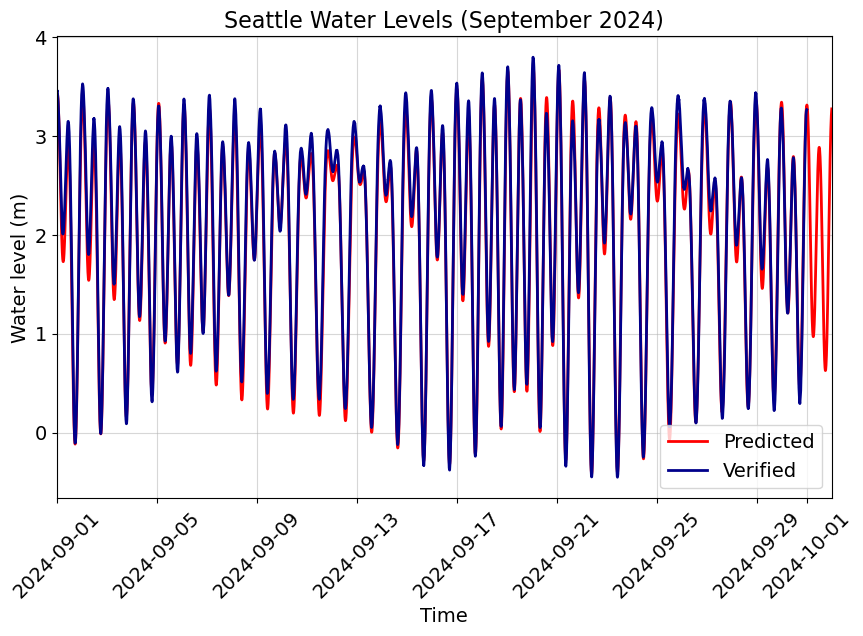

In [34]:
# create an empty figure
fig, ax = plt.subplots(figsize=(10, 6))

# plot the predicted water level values
ax.plot(date_array, predicted, c='red', linewidth=2, label="Predicted")

# plot the verified water level values
ax.plot(date_array, verified, c='darkblue', linewidth=2, label="Verified")

# add a grid
ax.grid(alpha = 0.5) # set the transparency to 1/2

# add axis labels
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Water level (m)", fontsize=14)

# add a title
ax.set_title("Seattle Water Levels (September 2024)", fontsize=16)

# add a legend
ax.legend(fontsize=14)


# Some additional customization you can do

# Set the font size of the y axis tick labels
ax.yaxis.set_tick_params(labelsize=14)

# Set the font size of the x axis tick labels
# and rotate the labels 45 degrees so that they aren't overlapping
ax.xaxis.set_tick_params(labelsize=14, rotation=45)

# Set the x limit to the first and last day to remove extra white space
ax.set_xlim([date_array[0], date_array[-1]]);